In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\kingd\Documents\mydata\steam_reviews.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


None

In [5]:
print(df.isna().sum())

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64


In [15]:
df = df.dropna(subset=['review'])
print(df.isna().sum())
display(df.head())

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64


,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


<AxesSubplot:xlabel='is_early_access_review', ylabel='count'>

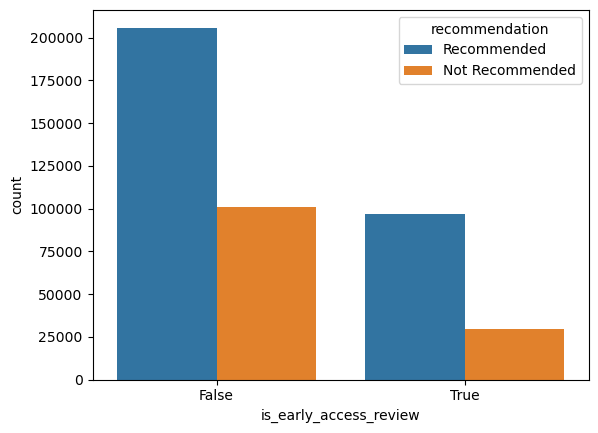

In [37]:
sns.countplot(x="is_early_access_review", hue="recommendation", data=df)

# This graph does to an extent show a relationship, but the bars don't convey it very well.

In [46]:
df['is_early_access_review'].value_counts(normalize = True)

False    0.70757
True     0.29243
Name: is_early_access_review, dtype: float64

In [47]:
df['recommendation'].value_counts(normalize = True)

Recommended        0.698589
Not Recommended    0.301411
Name: recommendation, dtype: float64

In [48]:
from scipy.stats import chi2_contingency

In [49]:
ct = pd.crosstab(df['is_early_access_review'], df['recommendation'])

In [50]:
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
phi = np.sqrt(chi2/n)

In [51]:
print("Chi-squared statistic: ", chi2)
print("P-value: ", p)
print("Degrees of freedom: ", dof)
print("Phi coefficient: ", phi)
print("Expected frequencies:\n", expected)

Chi-squared statistic:  3710.277468930826
P-value:  0.0
Degrees of freedom:  1
Phi coefficient:  0.09252759354478898
Expected frequencies:
 [[ 92425.57884511 214217.42115489]
 [ 38198.42115489  88533.57884511]]
